# What you should do here

This notebook needs to load models from disk, run evaluations and make a dataframe with the evaluations of the results.

If there are random parts in the code, make sure to have seeds to make your results repro- ducible.
The reproduce_results.ipynb notebook:
* Is a responsability of all members of a group. All of you should execute this and ensure
it works as expected.
* Contain train/validation/test results of ROC AUC (it is available in Scikit-learn: sklearn
.metrics.roc_auc_score) as well as precision and recall.

Note that the teacher will only load and run this notebook, unless there is something very unclear requiring the execution of train_models.ipynb as well.Additional notes:
* This notebook does not have to train anything.
* It should be relatively fast to execute (probably less than 10 minutes since there is no training).
* This notebook should only load previously trained models from disk. After loading the models, it should make predictions and compute metrics.

In [1]:
import pickle
import os
import pandas as pd

from utils import *

[nltk_data] Downloading package wordnet to /Users/max/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/Users/max/My Drive/_Universität_HPI/Semester 6/NLP/Assignment 1/barcelona_nlp/assign3max/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
home_dir = os.environ['HOME']
path_folder_quora = home_dir + '/Datasets/QuoraQuestionPairs'

In [3]:
import pickle
import scipy.sparse

# Load the saved model
with open('models/simple_solution/X_tr_q1q2.pkl', 'rb') as file:
    X_tr_q1q2 = pickle.load(file)
    X_tr_q1q2 = scipy.sparse.csr_matrix(X_tr_q1q2)
with open('models/simple_solution/labels_train.pkl', 'rb') as file:
    labels_train = pickle.load(file)

with open('models/simple_solution/X_val_q1q2.pkl', 'rb') as file:
    X_val_q1q2 = pickle.load(file)
    X_val_q1q2 = scipy.sparse.csr_matrix(X_val_q1q2)
with open('models/simple_solution/labels_val.pkl', 'rb') as file:
    labels_val = pickle.load(file)

with open('models/simple_solution/X_te_q1q2.pkl', 'rb') as file:
    X_te_q1q2 = pickle.load(file)
    X_te_q1q2 = scipy.sparse.csr_matrix(X_te_q1q2)
with open('models/simple_solution/labels_test.pkl', 'rb') as file:
    labels_test = pickle.load(file)


In [4]:
with open('models/simple_solution/baseline.pkl', 'rb') as file:
    baseline = pickle.load(file)


/Users/max/My Drive/_Universität_HPI/Semester 6/NLP/Assignment 1/barcelona_nlp/assign3max/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.4.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Train set
Accuracy: 0.814
ROC AUC: 0.8899
Precision: 0.782
Recall: 0.6867
F1 Score: 0.7313
Log Loss: 0.409


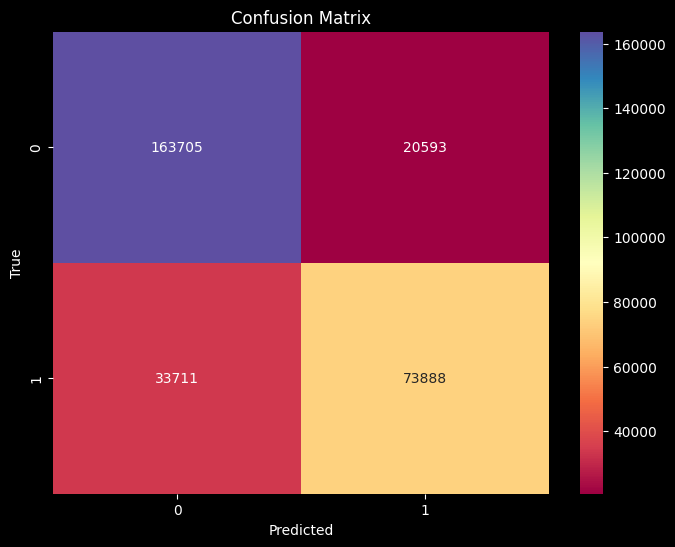


Validation set
Accuracy: 0.7491
ROC AUC: 0.8046
Precision: 0.6773
Recall: 0.6107
F1 Score: 0.6423
Log Loss: 0.5176


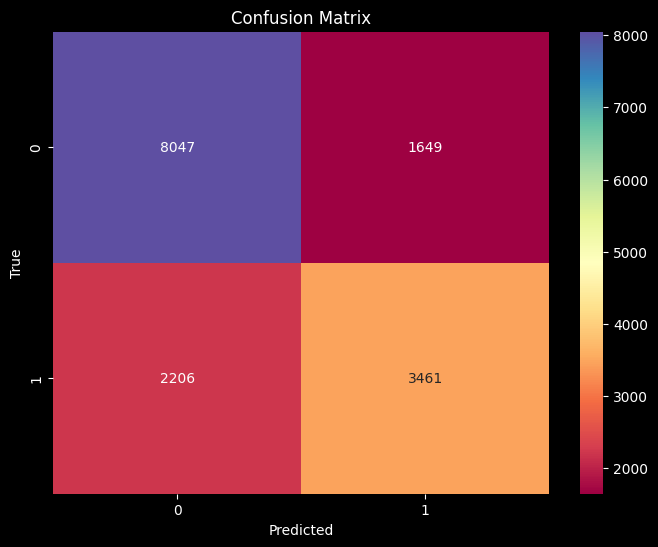


Test set
Accuracy: 0.7577
ROC AUC: 0.8137
Precision: 0.6955
Recall: 0.6186
F1 Score: 0.6548
Log Loss: 0.5082


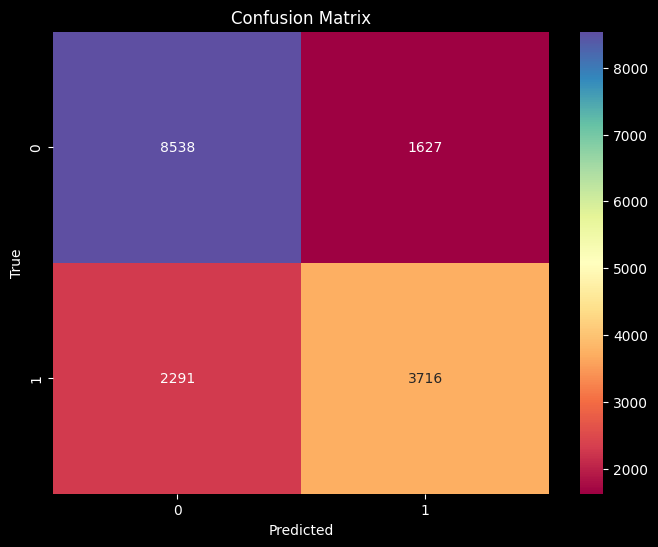

In [5]:
print('____________________________TRAIN SET____________________________')
evaluate_model(baseline, X_tr_q1q2, labels_train.to_list())
print()
print('____________________________VALIDATION SET____________________________')
evaluate_model(baseline, X_val_q1q2, labels_val.to_list())
print()
print('____________________________SET SET____________________________')
evaluate_model(baseline, X_te_q1q2, labels_test.to_list())


# Complex model


In [25]:
with open('models/complex_model/tr_df_copy', 'rb') as file:
    tr_df_copy = pickle.load(file)    
with open('models/complex_model/va_df_copy', 'rb') as file:
    va_df_copy = pickle.load(file)    
with open('models/complex_model/te_df_copy', 'rb') as file:
    te_df_copy = pickle.load(file)    


----------------------------TRAIN SET----------------------------
Accuracy: 0.8275332826299958
ROC AUC: 0.9135140298134354
Precision: 0.7507482802681557
Recall: 0.7969046114971573
F1 Score: 0.7731381756239128
Log Loss: 0.37670837581882916


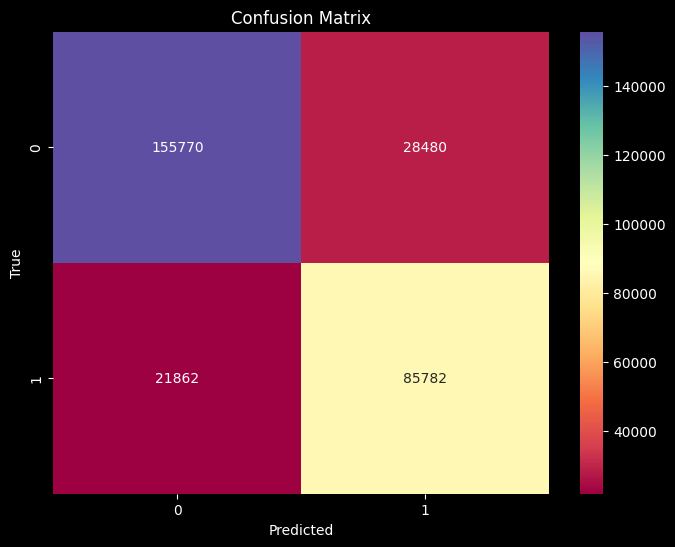

----------------------------VALIDATION SET----------------------------
Accuracy: 0.7596823537069582
ROC AUC: 0.8476502208792557
Precision: 0.6629760107364536
Recall: 0.7013309671694765
F1 Score: 0.6816143497757847
Log Loss: 0.44418112911782703


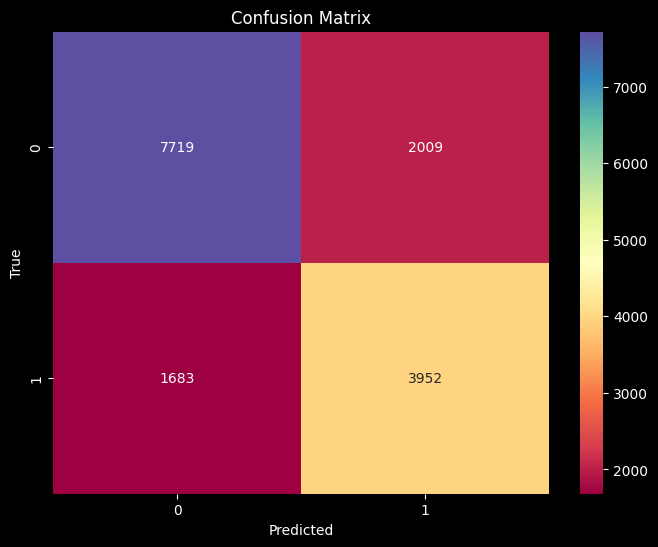

----------------------------TEST SET----------------------------
Accuracy: 0.7600173138758348
ROC AUC: 0.8470884505387026
Precision: 0.6686891266166374
Recall: 0.6986986986986987
F1 Score: 0.683364607979114
Log Loss: 0.44746957324285713


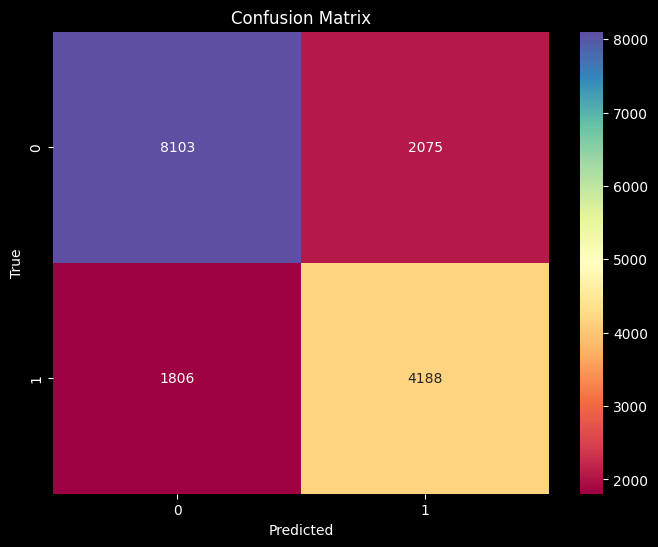

In [26]:
from utils import evaluate_boost,get_hand_features
with open('models/complex_model/bst1', 'rb') as file:
    feature_model = pickle.load(file)

print('----------------------------TRAIN SET----------------------------')
evaluate_boost(feature_model, tr_df_copy[get_hand_features()], tr_df_copy['is_duplicate'])
print('----------------------------VALIDATION SET----------------------------')
evaluate_boost(feature_model, va_df_copy[get_hand_features()], va_df_copy['is_duplicate'])
print('----------------------------TEST SET----------------------------')
evaluate_boost(feature_model, te_df_copy[get_hand_features()], te_df_copy['is_duplicate'])

----------------------------TRAIN SET----------------------------
Accuracy: 0.9935593057753842
ROC AUC: 0.9997735562024215
Precision: 0.9880664513151822
Recall: 0.9945468395823269
F1 Score: 0.991296054520033
Log Loss: 0.07330163603869995


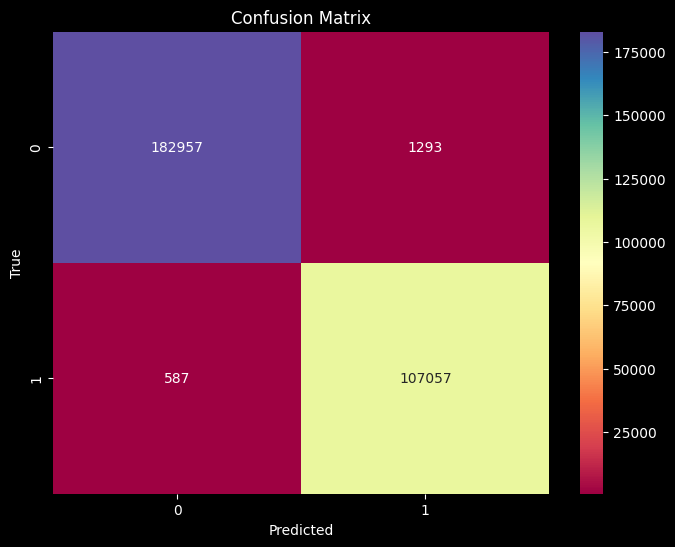

----------------------------VALIDATION SET----------------------------
Accuracy: 0.8480765475493067
ROC AUC: 0.9215564508125904
Precision: 0.7972267242931749
Recall: 0.785625554569654
F1 Score: 0.7913836253128351
Log Loss: 0.3711042272662626


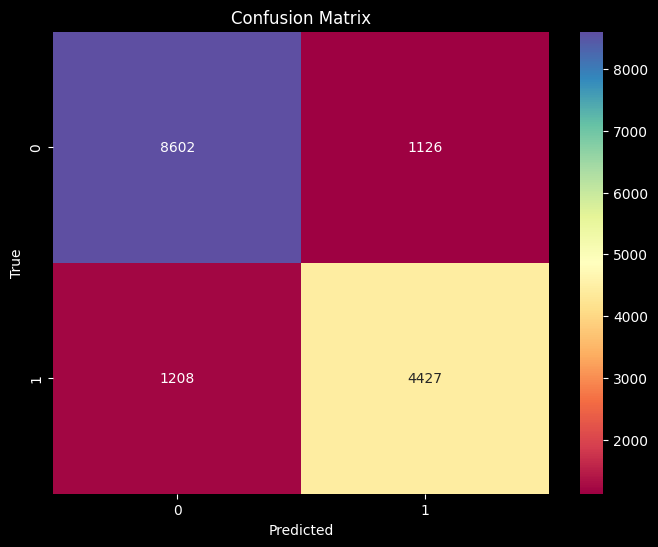

----------------------------TEST SET----------------------------
Accuracy: 0.8417635419243136
ROC AUC: 0.9192451769251403
Precision: 0.7908552074513124
Recall: 0.7791124457791124
F1 Score: 0.7849399109168838
Log Loss: 0.3777052047799151


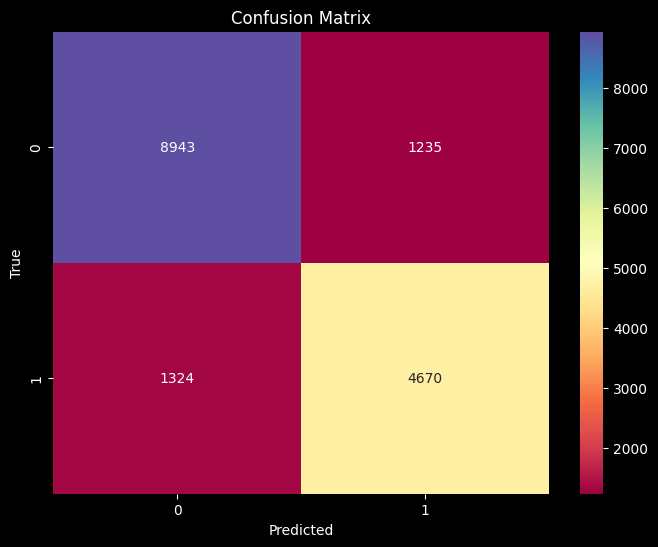

In [21]:
with open('models/complex_model/finalmodel', 'rb') as file:
    finalmodel = pickle.load(file)


with open('models/complex_model/F_train_all_norm', 'rb') as file:
    F_train_all_norm = pickle.load(file)
with open('models/complex_model/F_val_all_norm', 'rb') as file:
    F_val_all_norm = pickle.load(file)
with open('models/complex_model/F_test_all_norm', 'rb') as file:
    F_test_all_norm = pickle.load(file)

with open('models/complex_model/y_train', 'rb') as file:
    y_train = pickle.load(file)
with open('models/complex_model/y_val', 'rb') as file:
    y_val = pickle.load(file)
with open('models/complex_model/y_test', 'rb') as file:
    y_test = pickle.load(file)

print('----------------------------TRAIN SET----------------------------')
evaluate_boost(finalmodel, F_train_all_norm, y_train)
print('----------------------------VALIDATION SET----------------------------')
evaluate_boost(finalmodel, F_val_all_norm, y_val)
print('----------------------------TEST SET----------------------------')
evaluate_boost(finalmodel, F_test_all_norm, y_test)